In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt

sns.set_context('notebook')
sns.set_palette('tab10')

In [24]:
file_path = 'Top5000.csv'
df = pd.read_csv(file_path)

In [25]:
df.head()

,Unnamed: 0,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
0,0,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531,OK Computer,0.135763,0.288083,0.565917,0.161053,0.159375,-9.102417,0.056308,115.450750,0.291733,268435.500000,4.000000
1,1,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983,Wish You Were Here,0.602800,0.373600,0.409800,0.363040,0.384940,-12.689400,0.039740,130.018800,0.259040,530512.000000,3.600000
2,2,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870,In the Court of the Crimson King,0.297686,0.340625,0.370475,0.327265,0.149138,-14.873125,0.043463,118.920625,0.279400,507644.125000,3.875000
3,3,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734,Kid A,0.123219,0.601294,0.676706,0.000669,0.311412,-7.811941,0.268318,116.045059,0.398206,325379.529412,4.058824
4,4,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379,To Pimp a Butterfly,0.322889,0.590750,0.707625,0.000011,0.318419,-5.802062,0.294175,103.444563,0.487187,296225.750000,3.812500


In [30]:
df.rename(columns = {'Unnamed: 0':'Rank'}, inplace=True)

In [31]:
df.columns

Index(['Rank', 'ars_name', 'rel_date', 'gens', 'descs', 'avg_rat', 'num_rat',
       'num_revs', 'album', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'duration_ms', 'time_signature'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4402 entries, 0 to 4401
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              4402 non-null   int64  
 1   ars_name          4402 non-null   object 
 2   rel_date          4402 non-null   object 
 3   gens              4402 non-null   object 
 4   descs             4304 non-null   object 
 5   avg_rat           4402 non-null   float64
 6   num_rat           4402 non-null   object 
 7   num_revs          4402 non-null   int64  
 8   album             4402 non-null   object 
 9   acousticness      4402 non-null   float64
 10  danceability      4402 non-null   float64
 11  energy            4402 non-null   float64
 12  instrumentalness  4402 non-null   float64
 13  liveness          4402 non-null   float64
 14  loudness          4402 non-null   float64
 15  speechiness       4402 non-null   float64
 16  tempo             4402 non-null   float64


In [86]:
X = df.drop(columns = ['Rank'])
y = df['Rank']

In [87]:
X

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
0,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531,OK Computer,0.135763,0.288083,0.565917,0.161053,0.159375,-9.102417,0.056308,115.450750,0.291733,268435.500000,4.000000
1,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983,Wish You Were Here,0.602800,0.373600,0.409800,0.363040,0.384940,-12.689400,0.039740,130.018800,0.259040,530512.000000,3.600000
2,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870,In the Court of the Crimson King,0.297686,0.340625,0.370475,0.327265,0.149138,-14.873125,0.043463,118.920625,0.279400,507644.125000,3.875000
3,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734,Kid A,0.123219,0.601294,0.676706,0.000669,0.311412,-7.811941,0.268318,116.045059,0.398206,325379.529412,4.058824
4,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379,To Pimp a Butterfly,0.322889,0.590750,0.707625,0.000011,0.318419,-5.802062,0.294175,103.444563,0.487187,296225.750000,3.812500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4397,John Hiatt,May 1987,"Singer/Songwriter, Roots Rock, Americana","love, lethargic, lonely, existential, melodic,...",3.68,727,37,Bring the Family,0.286402,0.607100,0.460700,0.001658,0.125710,-12.683700,0.030090,106.136700,0.568300,273146.700000,4.000000
4398,Catharsis,1999,"Crust Punk, Metalcore","male vocals, anarchism, aggressive, angry, hea...",3.65,616,6,Passion,0.156502,0.572050,0.621100,0.004154,0.250530,-6.659900,0.088560,127.249950,0.432750,202675.450000,3.950000
4399,Gracious,17 July 1970,"Progressive Rock, Symphonic Prog",NaN,3.69,565,32,Gracious!,0.075487,0.528636,0.731000,0.000128,0.222845,-4.805273,0.049027,149.398818,0.622545,193269.454545,4.000000
4400,And Also the Trees,12 November 2007,Art Rock,"atmospheric, poetic, dark, male vocals, ominou...",3.68,524,15,(Listen For) The Rag and Bone Man,0.417308,0.397462,0.458000,0.543231,0.127646,-13.088692,0.037354,118.958923,0.252892,229115.846154,3.923077


In [88]:
X.corr()

,avg_rat,num_revs,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
avg_rat,1.000000,0.490751,0.124217,0.000421,-0.116479,0.034683,-0.016379,-0.101772,-0.011385,-0.098267,0.026872,0.029594,-0.025788
num_revs,0.490751,1.000000,-0.132044,-0.004617,0.106527,-0.078873,0.058759,0.101906,-0.008280,0.068480,0.036414,-0.031180,0.042291
acousticness,0.124217,-0.132044,1.000000,-0.074421,-0.821177,0.191173,-0.218962,-0.670216,-0.181022,-0.363589,-0.130452,0.089085,-0.252553
danceability,0.000421,-0.004617,-0.074421,1.000000,0.028388,-0.477999,-0.081673,0.238713,0.332744,0.060768,0.675392,-0.291315,0.261627
energy,-0.116479,0.106527,-0.821177,0.028388,1.000000,-0.193050,0.327978,0.816708,0.202518,0.374051,0.196428,-0.100783,0.242536
instrumentalness,0.034683,-0.078873,0.191173,-0.477999,-0.193050,1.000000,-0.096014,-0.405098,-0.190208,-0.142105,-0.500752,0.237392,-0.194298
liveness,-0.016379,0.058759,-0.218962,-0.081673,0.327978,-0.096014,1.000000,0.225094,0.258071,0.061589,0.019025,-0.035533,0.034095
loudness,-0.101772,0.101906,-0.670216,0.238713,0.816708,-0.405098,0.225094,1.000000,0.178666,0.336096,0.278090,-0.186829,0.263846
speechiness,-0.011385,-0.008280,-0.181022,0.332744,0.202518,-0.190208,0.258071,0.178666,1.000000,-0.039684,0.124859,-0.100588,0.101473
tempo,-0.098267,0.068480,-0.363589,0.060768,0.374051,-0.142105,0.061589,0.336096,-0.039684,1.000000,0.186306,-0.074267,0.131290


In [89]:
X.corr().abs()

,avg_rat,num_revs,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
avg_rat,1.000000,0.490751,0.124217,0.000421,0.116479,0.034683,0.016379,0.101772,0.011385,0.098267,0.026872,0.029594,0.025788
num_revs,0.490751,1.000000,0.132044,0.004617,0.106527,0.078873,0.058759,0.101906,0.008280,0.068480,0.036414,0.031180,0.042291
acousticness,0.124217,0.132044,1.000000,0.074421,0.821177,0.191173,0.218962,0.670216,0.181022,0.363589,0.130452,0.089085,0.252553
danceability,0.000421,0.004617,0.074421,1.000000,0.028388,0.477999,0.081673,0.238713,0.332744,0.060768,0.675392,0.291315,0.261627
energy,0.116479,0.106527,0.821177,0.028388,1.000000,0.193050,0.327978,0.816708,0.202518,0.374051,0.196428,0.100783,0.242536
instrumentalness,0.034683,0.078873,0.191173,0.477999,0.193050,1.000000,0.096014,0.405098,0.190208,0.142105,0.500752,0.237392,0.194298
liveness,0.016379,0.058759,0.218962,0.081673,0.327978,0.096014,1.000000,0.225094,0.258071,0.061589,0.019025,0.035533,0.034095
loudness,0.101772,0.101906,0.670216,0.238713,0.816708,0.405098,0.225094,1.000000,0.178666,0.336096,0.278090,0.186829,0.263846
speechiness,0.011385,0.008280,0.181022,0.332744,0.202518,0.190208,0.258071,0.178666,1.000000,0.039684,0.124859,0.100588,0.101473
tempo,0.098267,0.068480,0.363589,0.060768,0.374051,0.142105,0.061589,0.336096,0.039684,1.000000,0.186306,0.074267,0.131290


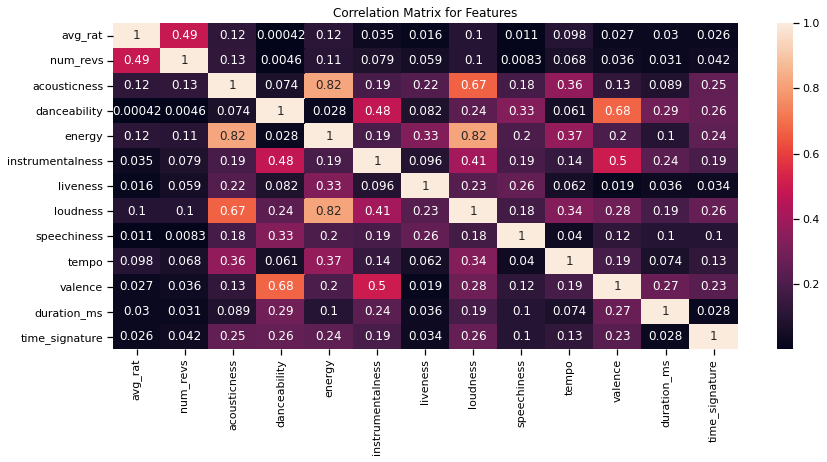

In [90]:
plt.figure(figsize=(14, 6))
sns.heatmap(X.corr().abs(), annot=True)

plt.title('Correlation Matrix for Features')
plt.savefig("corrmat.jpg", dpi = 300)
plt.show()

In [109]:
s = X['num_rat']

In [117]:
X['num_rat'] = s.str.replace("," , "")

In [118]:
X.head()

,ars_name,rel_date,gens,descs,avg_rat,num_rat,num_revs,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
0,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,70382,1531,OK Computer,0.135763,0.288083,0.565917,0.161053,0.159375,-9.102417,0.056308,115.450750,0.291733,268435.500000,4.000000
1,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,48662,983,Wish You Were Here,0.602800,0.373600,0.409800,0.363040,0.384940,-12.689400,0.039740,130.018800,0.259040,530512.000000,3.600000
2,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,44943,870,In the Court of the Crimson King,0.297686,0.340625,0.370475,0.327265,0.149138,-14.873125,0.043463,118.920625,0.279400,507644.125000,3.875000
3,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,58590,734,Kid A,0.123219,0.601294,0.676706,0.000669,0.311412,-7.811941,0.268318,116.045059,0.398206,325379.529412,4.058824
4,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,44206,379,To Pimp a Butterfly,0.322889,0.590750,0.707625,0.000011,0.318419,-5.802062,0.294175,103.444563,0.487187,296225.750000,3.812500


In [119]:
X = X.drop(columns = ['energy', 'ars_name', 'rel_date', 'gens', 'descs', 'album'])
X.head()

,avg_rat,num_rat,num_revs,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
0,4.23,70382,1531,0.135763,0.288083,0.161053,0.159375,-9.102417,0.056308,115.450750,0.291733,268435.500000,4.000000
1,4.29,48662,983,0.602800,0.373600,0.363040,0.384940,-12.689400,0.039740,130.018800,0.259040,530512.000000,3.600000
2,4.30,44943,870,0.297686,0.340625,0.327265,0.149138,-14.873125,0.043463,118.920625,0.279400,507644.125000,3.875000
3,4.21,58590,734,0.123219,0.601294,0.000669,0.311412,-7.811941,0.268318,116.045059,0.398206,325379.529412,4.058824
4,4.27,44206,379,0.322889,0.590750,0.000011,0.318419,-5.802062,0.294175,103.444563,0.487187,296225.750000,3.812500


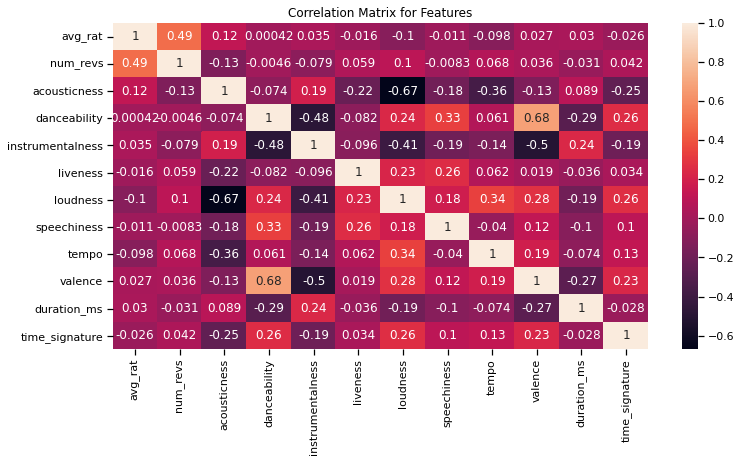

In [120]:
plt.figure(figsize=(12, 6))
sns.heatmap(X.corr(), annot=True)

plt.title('Correlation Matrix for Features')
plt.savefig("corrmat_2.jpg", dpi = 300)
plt.show()

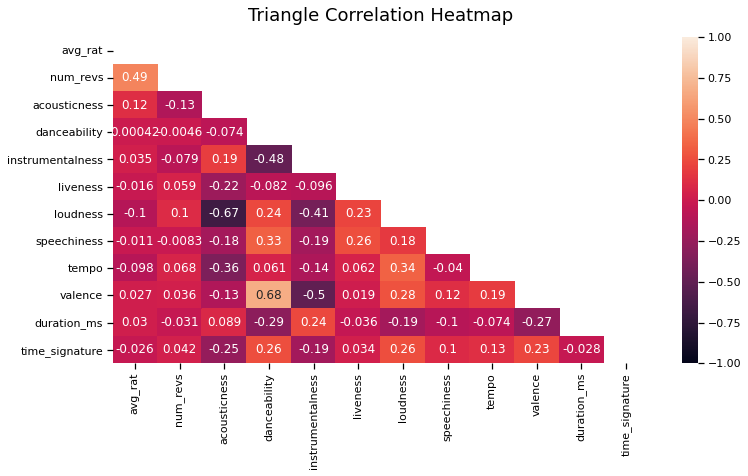

In [121]:
plt.figure(figsize=(12, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(X.corr(), dtype=bool))
heatmap = sns.heatmap(X.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [122]:
X_augmented = sm.add_constant(X)
X_augmented

,const,avg_rat,num_rat,num_revs,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
0,1.0,4.23,70382,1531,0.135763,0.288083,0.161053,0.159375,-9.102417,0.056308,115.450750,0.291733,268435.500000,4.000000
1,1.0,4.29,48662,983,0.602800,0.373600,0.363040,0.384940,-12.689400,0.039740,130.018800,0.259040,530512.000000,3.600000
2,1.0,4.30,44943,870,0.297686,0.340625,0.327265,0.149138,-14.873125,0.043463,118.920625,0.279400,507644.125000,3.875000
3,1.0,4.21,58590,734,0.123219,0.601294,0.000669,0.311412,-7.811941,0.268318,116.045059,0.398206,325379.529412,4.058824
4,1.0,4.27,44206,379,0.322889,0.590750,0.000011,0.318419,-5.802062,0.294175,103.444563,0.487187,296225.750000,3.812500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4397,1.0,3.68,727,37,0.286402,0.607100,0.001658,0.125710,-12.683700,0.030090,106.136700,0.568300,273146.700000,4.000000
4398,1.0,3.65,616,6,0.156502,0.572050,0.004154,0.250530,-6.659900,0.088560,127.249950,0.432750,202675.450000,3.950000
4399,1.0,3.69,565,32,0.075487,0.528636,0.000128,0.222845,-4.805273,0.049027,149.398818,0.622545,193269.454545,4.000000
4400,1.0,3.68,524,15,0.417308,0.397462,0.543231,0.127646,-13.088692,0.037354,118.958923,0.252892,229115.846154,3.923077


In [130]:
results = sm.OLS(y, X_augmented.astype(float)).fit()

In [131]:
results.params

const               40788.245152
avg_rat            -10277.787932
num_rat                -0.028091
num_revs                0.852995
acousticness          157.038526
danceability          162.954145
instrumentalness       31.475361
liveness              -37.878144
loudness               -2.138565
speechiness          -406.405796
tempo                   0.341124
valence               246.409391
duration_ms             0.000064
time_signature        -13.534652
dtype: float64

In [132]:
results.rsquared

0.7186838229421662

In [133]:
results.rsquared_adj

0.7178503885069447

In [139]:
X.num_rat = X.num_rat.astype(float)

In [140]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4402 entries, 0 to 4401
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   avg_rat           4402 non-null   float64
 1   num_rat           4402 non-null   float64
 2   num_revs          4402 non-null   int64  
 3   acousticness      4402 non-null   float64
 4   danceability      4402 non-null   float64
 5   instrumentalness  4402 non-null   float64
 6   liveness          4402 non-null   float64
 7   loudness          4402 non-null   float64
 8   speechiness       4402 non-null   float64
 9   tempo             4402 non-null   float64
 10  valence           4402 non-null   float64
 11  duration_ms       4402 non-null   float64
 12  time_signature    4402 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 447.2 KB


In [141]:
X_standard = X.apply(lambda x: (x-x.mean())/ x.std())

In [142]:
X_standard.describe()

,avg_rat,num_rat,num_revs,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature
count,4.402000e+03,4.402000e+03,4.402000e+03,4.402000e+03,4.402000e+03,4.402000e+03,4.402000e+03,4.402000e+03,4.402000e+03,4.402000e+03,4.402000e+03,4.402000e+03,4.402000e+03
mean,3.770622e-15,5.165236e-17,-2.582618e-17,8.070681e-17,-3.099141e-16,7.102199e-17,7.667147e-17,9.684817e-17,-3.873927e-17,7.489592e-16,-2.388922e-16,-7.102199e-17,-2.652026e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.498071e+00,-6.561590e-01,-6.774677e-01,-1.174670e+00,-2.538152e+00,-8.748628e-01,-1.757136e+00,-6.655888e+00,-7.453065e-01,-3.969427e+00,-2.110145e+00,-1.252848e+00,-1.260982e+01
25%,-7.089057e-01,-5.665314e-01,-5.358470e-01,-8.562551e-01,-6.800578e-01,-8.411015e-01,-6.516194e-01,-4.580244e-01,-5.529813e-01,-5.977615e-01,-7.526833e-01,-4.348331e-01,-3.791069e-01
50%,-2.119153e-01,-3.763987e-01,-3.322673e-01,-2.673296e-01,-2.189104e-02,-4.319136e-01,-2.296627e-01,2.085248e-01,-3.882366e-01,-7.665476e-03,4.153078e-03,-2.133295e-01,2.720656e-01
75%,3.844732e-01,1.299797e-01,1.279999e-01,7.134663e-01,6.756861e-01,6.012684e-01,3.884400e-01,7.009233e-01,8.584217e-02,5.860858e-01,7.632120e-01,1.136881e-01,6.401196e-01
max,5.652571e+00,1.060201e+01,1.303318e+01,2.282605e+00,2.955818e+00,2.588766e+00,7.650877e+00,2.235175e+00,1.047826e+01,5.265890e+00,2.815716e+00,1.835101e+01,5.056768e+00


In [143]:
X_standard_aug = sm.add_constant(X_standard)

In [144]:
results_standardized = sm.OLS(y, X_standard_aug).fit()

In [145]:
weights = results_standardized.params
weights

const               2200.500000
avg_rat            -1034.002655
num_rat             -174.966775
num_revs              96.369563
acousticness          45.240917
danceability          25.837303
instrumentalness       9.023782
liveness              -3.643270
loudness             -11.114791
speechiness          -33.233583
tempo                  5.094339
valence               49.522876
duration_ms           12.547177
time_signature        -3.064462
dtype: float64

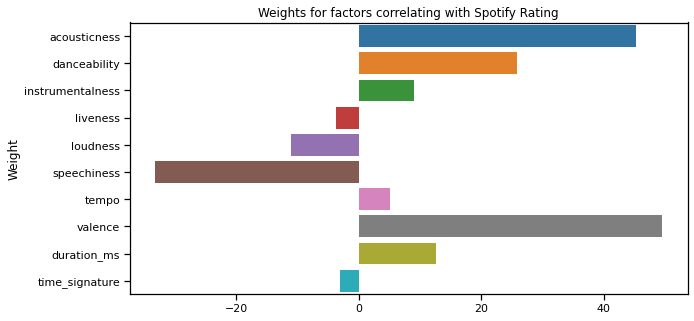

In [156]:
plt.figure(figsize=(10,5))
sns.barplot(y = weights[4::].index, x = weights[4::].values)
plt.title("Weights for factors correlating with Spotify Rating")
plt.ylabel('Weight')
plt.show()

In [147]:
results_standardized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     862.3
Date:                Wed, 27 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:35:02   Log-Likelihood:                -34917.
No. Observations:                4402   AIC:                         6.986e+04
Df Residuals:                    4388   BIC:                         6.995e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2200.5000     10.175    216.271      0.000    2180.552    2220.448
avg_rat          -1034.0027     12.379    -83.527      0.000   -1058.272   -1009.733
num_rat           -174.9668     26.025     -6.723      0.000    -225.990    -123.944
num_revs            96.3696     25.508      3.778      0.000      46.361     146.378
acousticness        45.2409     14.598      3.099      0.002      16.621      73.861
danceability        25.8373     15.872      1.628      0.104      -5.280      56.955
instrumentalness     9.0238     12.850      0.702      0.483     -16.169      34.216
liveness            -3.6433     11.128     -0.327      0.743     -25.459      18.173
loudness           -11.1148     15.194     -0.732      0.464     -40.902      18.672
speechiness        -33.2336     11.748     -2.829      0.005     -56.265     -10.202
tempo                5.0943     11.273      0.452      0.651     -17.007      27.196
valence             49.5229     14.999      3.302      0.001      20.118      78.928
duration_ms         12.5472     10.838      1.158      0.247      -8.700      33.794
time_signature      -3.0645     10.951     -0.280      0.780     -24.534      18.406
==============================================================================
Omnibus:                      538.351   Durbin-Watson:                   0.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              975.549
Skew:                           0.804   Prob(JB):                    1.45e-212
Kurtosis:                       4.653   Cond. No.                         6.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""